In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

    
df = pd.DataFrame({"happy":[12,22,32,42,53,64,75,85,96,52,53,53,35,36,46,57,86,35,64],
                   'heartrate':  [98,88,98,98,47,36,125,115,94,58,147,117,115,114,134,143,114,65,106]})


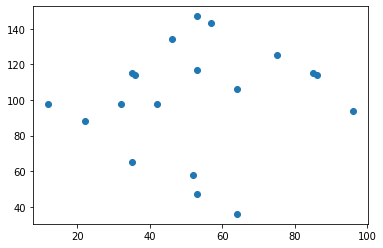

In [3]:
plt.scatter(df['happy'],df['heartrate'])

In [4]:
km = KMeans(n_clusters=2)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [5]:
y_predict = km.fit_predict(df[['happy','heartrate']])
y_predict

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1],
      dtype=int32)

In [6]:
df['cluster']=y_predict
df

,happy,heartrate,cluster
0,12,98,0
1,22,88,0
2,32,98,0
3,42,98,0
4,53,47,0
5,64,36,0
6,75,125,1
7,85,115,1
8,96,94,1
9,52,58,0


11
    happy  heartrate  cluster
6      75        125        1
7      85        115        1
8      96         94        1
10     53        147        1
11     53        117        1
12     35        115        1
13     36        114        1
14     46        134        1
15     57        143        1
16     86        114        1
18     64        106        1


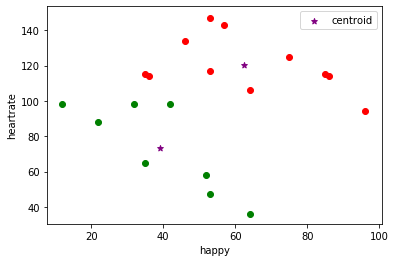

In [7]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]

plt.scatter(df1.happy,df1['heartrate'],color='green')
plt.scatter(df2.happy,df2['heartrate'],color='red')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('happy')
plt.ylabel('heartrate')
plt.legend()
if len(df1)>len(df2):
    print(len(df1))
    print(df1)
else:
    print(len(df2))
    print(df2)
#print(km.cluster_centers_[0][0])
#print(km.cluster_centers_[0][1])
#print(km.cluster_centers_[1][0])
#print(km.cluster_centers_[1][1])


In [8]:

sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df[['happy','heartrate']])
    sse.append(km.inertia_)
   

  
  
 

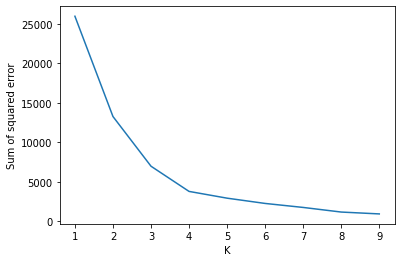

In [9]:

plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

hello


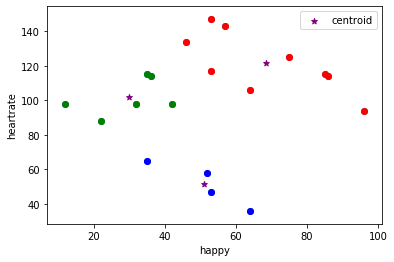

In [12]:
def GetCategory (confidence,heartrate):
    df = pd.DataFrame({"happy":[12,22,32,42,53,64,75,85,96,52,53,53,35,36,46,57,86,35,64],
                   'heartrate':  [98,88,98,98,47,36,125,115,94,58,147,117,115,114,134,143,114,65,106]})
    plt.scatter(df['happy'],df['heartrate'])
    km = KMeans(n_clusters=3)
    y_predict = km.fit_predict(df[['happy','heartrate']])
    df['cluster']=y_predict
    df1=df[df.cluster==0]
    df2=df[df.cluster==1]
    df3=df[df.cluster==2]
    plt.scatter(df1.happy,df1['heartrate'],color='green')
    plt.scatter(df2.happy,df2['heartrate'],color='red')
    plt.scatter(df3.happy,df3['heartrate'],color='blue')
    plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
    plt.xlabel('happy')
    plt.ylabel('heartrate')
    plt.legend()
    if len(df1)>len(df2) and len(df1)>len(df3):
        print("df1 is the best!!!")
        return(df1)
    
    elif len(df2)>len(df1) and len(df2)>len(df3):
        print("hello")
        return(df2)
    else:
        print("iris")
        return(df3)
                                       
                                            
    #else:
                                            #return(df3)
data=GetCategory(1,2)                                      
    

    


df1 is the best!!!
    happy  heartrate  cluster
6      75        125        0
7      85        115        0
8      96         94        0
10     53        147        0
11     53        117        0
14     46        134        0
15     57        143        0
16     86        114        0
18     64        106        0
test
68.33333333333333
121.66666666666667
low


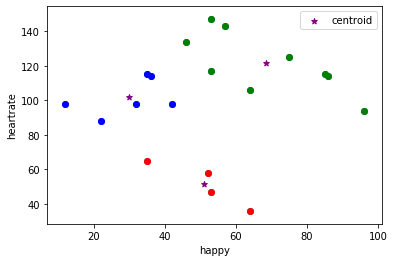

In [41]:
data=DefineRiskLevel(1,2)
print(data)
print("test")
print(data['happy'].mean())
print(data['heartrate'].mean())

def DefineRiskLevel ():
    if data['happy'].mean() >60 and data['heartrate'].mean()>90:
        return "low"
    elif 40<=data['happy'].mean()<60 and data['heartrate'].mean()<90:
        return "medium"
    elif data['happy'].mean() <40 and data['heartrate'].mean()<90:
        return "high"

risklevel = DefineRiskLevel()
print(risklevel)